# Calculus I: Limits & Derivatives

This topic, *Calculus I: Limits & Derivatives*, introduces the mathematical field of calculus -- the study of rates of change -- from the ground up. It is essential because computing derivatives via differentiation is the basis of optimizing most machine learning algorithms, including those used in deep learning such as backpropagation and stochastic gradient descent. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of how calculus is used to compute limits and differentiate functions. You’ll also learn how to apply automatic differentiation within the popular TensorFlow 2 and PyTorch machine learning libraries. The content covered in this class is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Calculus II* and *Optimization*.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Limits*

* What Calculus Is
* A Brief History of Calculus
* The Method of Exhaustion 
* Calculating Limits 

*Segment 2: Computing Derivatives with Differentiation*
* The Delta Method
* The Differentiation Equation
* Derivative Notation
* The Power Rule
* The Constant Multiple Rule
* The Sum Rule
* The Product Rule
* The Quotient Rule
* The Chain Rule

*Segment 3: Automatic Differentiation*
* AutoDiff with PyTorch
* AutoDiff with TensorFlow 2
* Machine Learning via Differentiation 
* Cost (or Loss) Functions
* The Future: Differentiable Programming 

## Segment 1: Limits

### The Calculus of Infinitesimals

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-10, 10, 10000)
x

array([-10.       ,  -9.9979998,  -9.9959996, ...,   9.9959996,
         9.9979998,  10.       ])

If 
$y = x^2 + 2x + 2$: 

In [4]:
y = x**2 + 2*x + 2

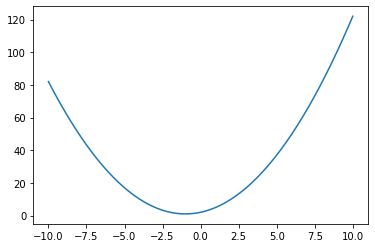

In [5]:
fig, ax = plt.subplots()
_ = ax.plot(x, y)

* There are no straight lines on the curve. 
* If we zoom in _infinitely_ close, however, we observe curves that _approach_ lines. 
* This enables us to find a slope $m$ (tangent) anywhere on the curve, including to identify where $m = 0$: 

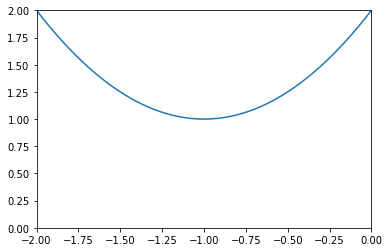

In [6]:
fig, ax = plt.subplots()
ax.set_xlim([-2, -0])
ax.set_ylim([0, 2])
_ = ax.plot(x,y)

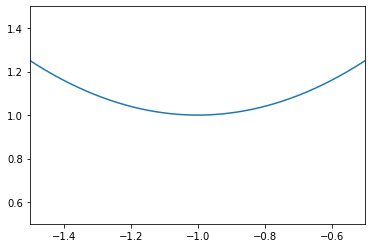

In [7]:
fig, ax = plt.subplots()
ax.set_xlim([-1.5, -0.5])
ax.set_ylim([0.5, 1.5])
_ = ax.plot(x,y)

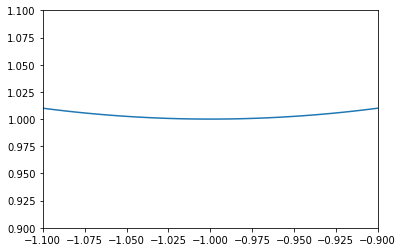

In [8]:
fig, ax = plt.subplots()
ax.set_xlim([-1.1, -0.9])
ax.set_ylim([0.9, 1.1])
_ = ax.plot(x,y)

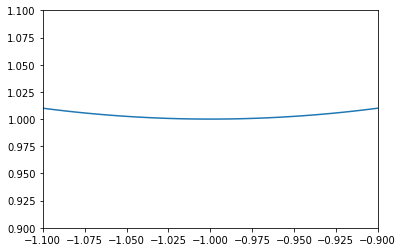

In [9]:
fig, ax = plt.subplots()
ax.set_xlim([-1.1, -0.9])
ax.set_ylim([0.9, 1.1])
_ = ax.plot(x,y)

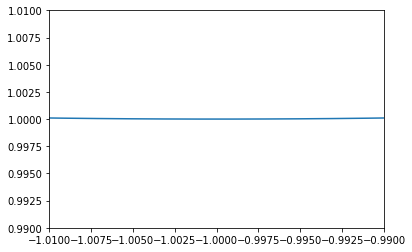

In [10]:
fig, ax = plt.subplots()
ax.set_xlim([-1.01, -0.99])
ax.set_ylim([0.99, 1.01])
_ = ax.plot(x,y)

If 
$z = 2*x^2 + 2x + 2$: 

Experimental section to understand how the equation works.

In [11]:
z = 1/(x**10 + 2*x + 2)

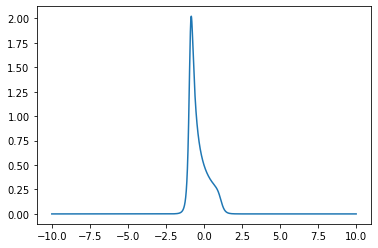

In [12]:
fig, ax = plt.subplots()
_ = ax.plot(x, z)

### Limits

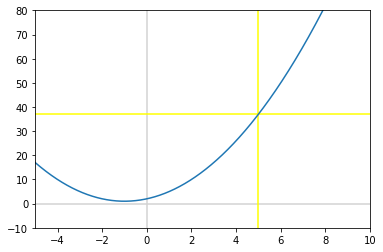

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-5, 10)
plt.ylim(-10, 80)
plt.axvline(x=5, color='yellow')
plt.axhline(y=37, color='yellow')
_ = ax.plot(x,y)

$$\lim_{x \to 1} \frac{x^2 - 1}{x - 1}$$

In [14]:
def my_fxn(my_x):
    my_y = (my_x**2 -1)/(my_x -1)
    return my_y

In [15]:
my_fxn(2)

3.0

In [16]:
my_fxn(0.9)

1.9

In [17]:
my_fxn(0.999)

1.9989999999999712

In [18]:
y = my_fxn(x)

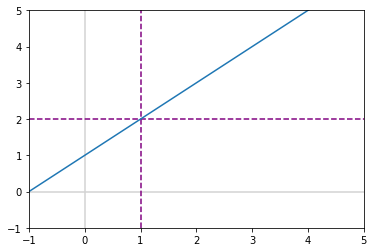

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axvline(x=1, color='purple', linestyle='--')
plt.axhline(y=2, color='purple', linestyle='--')
_ = ax.plot(x,y)

$$\lim_{x \to 0} \frac{\text{sin } x}{x}$$

In [20]:
def sin_fxn(my_x):
    my_y = np.sin(my_x)/my_x
    return my_y

In [21]:
y = sin_fxn(x)

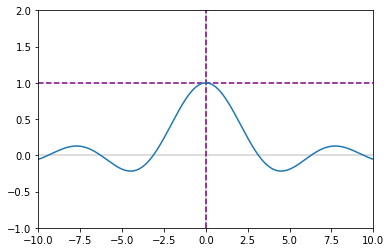

In [22]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-1, 2)
plt.axvline(x=0, color='purple', linestyle='--')
plt.axhline(y=1, color='purple', linestyle='--')
_ = ax.plot(x,y)

$$ \lim_{x \to \infty} \frac{25}{x} $$

In [23]:
def inf_fxn(my_x):
    my_y = 25/my_x
    return my_y

In [24]:
y = inf_fxn(x)

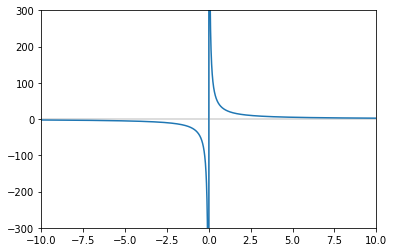

In [25]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(x, y)

In [26]:
left_x = x[x<0]
right_x = x[x>0]

In [27]:
left_y = inf_fxn(left_x)

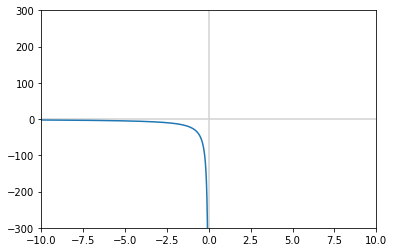

In [28]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(left_x, left_y)

In [29]:
right_y = inf_fxn(right_x)

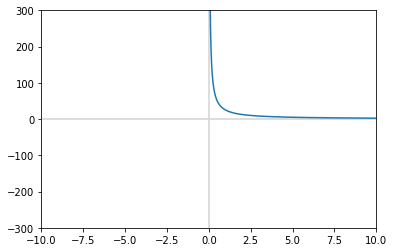

In [30]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(right_x, right_y)

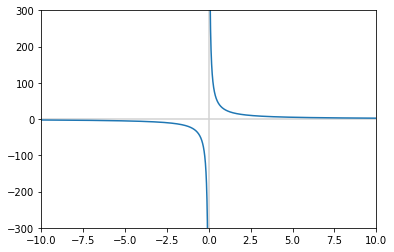

In [31]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
ax.plot(left_x, left_y, c='C0')
_ = ax.plot(right_x, right_y, c='C0')

1. $$ \lim_{x \to 0} \frac{x^2-1}{x-1} $$

In [32]:
def ary_fxn1(my_x):
    my_y = ((my_x**2)-1)/(my_x-1)
    return my_y

In [33]:
y_calc1 = ary_fxn1(0)
y_calc1

1.0

In [34]:
y_fn1 = ary_fxn1(x)

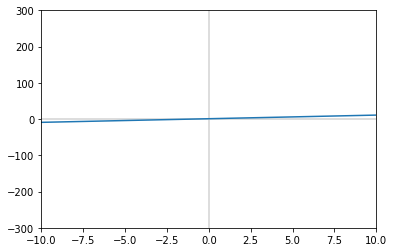

In [35]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(x, y_fn1)

2. $$ \lim_{x \to -5} \frac{x^2-25}{x+5} $$

In [36]:
def ary_fxn2(my_x):
    my_y = ((my_x**2)-25)/(my_x+5)
    return my_y

In [37]:
y_fn2 = ary_fxn2(x)

In [38]:
y_calc2 = ary_fxn2(5)
y_calc2

0.0

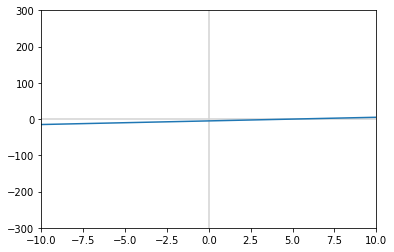

In [39]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(x, y_fn2)

3. $$ \lim_{x \to 4} \frac{x^2 -2x -8}{x-4} $$

In [40]:
def ary_fxn3(my_x):
    my_y = ((my_x**2)-(2*my_x)-8)/(my_x-4)
    return my_y

In [41]:
y_fn3 = ary_fxn3(x)

In [42]:
y_calc3 = ary_fxn3(4)
y_calc3

ZeroDivisionError: division by zero

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(x, y_fn3)

4. $$ \lim_{x \to -\infty} \frac{25}{x} $$

In [43]:
def ary_fxn4(my_x):
    my_y = 25/my_x
    return my_y

In [44]:
y_fn4 = ary_fxn4(x)

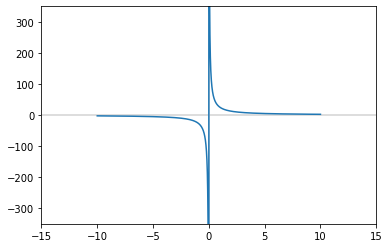

In [45]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-15, 15)
plt.ylim(-350, 350)
_ = ax.plot(x, y_fn4)

5. $$ \lim_{x \to 0} \frac{25}{x} $$

In [46]:
def ary_fxn5(my_x):
    my_y = 25/my_x
    return my_y

In [47]:
y_calc3 = ary_fxn5(0)
y_calc3

ZeroDivisionError: division by zero

In [48]:
y_fn5 = ary_fxn5(x)

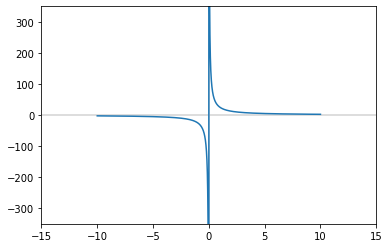

In [49]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-15, 15)
plt.ylim(-350, 350)
_ = ax.plot(x, y_fn4)

## Segment 2: Computing Derivatives with Differentiation

Let's bring back our ol' buddy $y = x^2 + 2x + 2$:

In [62]:
def f(my_x):
    my_x = my_x**2 + 2*my_x + 2
    return my_x

In [63]:
y = f(x)

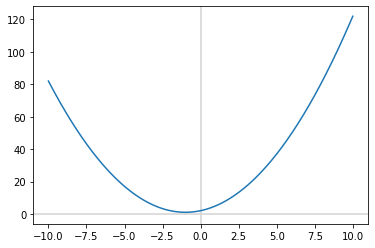

In [64]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(x,y)

Let's identify the slope where, say, $x = 2$.

First, let's determine what $y$ is: 

In [65]:
f(2)

10

Cool. Let's call this point $P$, which is located at (2, 10):

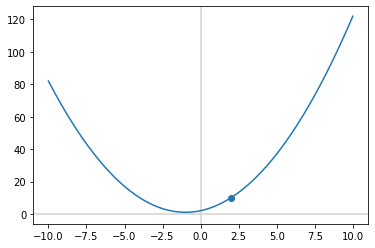

In [66]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
_ = ax.plot(x,y)

The _delta method_ uses the difference between two points to calculate slope. To illustrate this, let's define another point, $Q$ where, say, $x = 5$.

In [67]:
f(5)

37

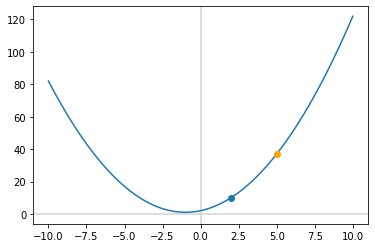

In [68]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5, 37, c = 'orange', zorder=3)
_ = ax.plot(x,y)

To find the slope $m$ between points $P$ and $Q$: 
$$m = \frac{\text{change in }y}{\text{change in }x} = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{37-10}{5-2} = \frac{27}{3} = 9$$

In [70]:
m = (37-10)/(5-2)
m

9.0

To plot the line that passes through $P$ and $Q$, we can rearrange the equation of a line $y = mx + b$ to solve for $b$: 
$$b = y - mx$$

In [71]:
b = 37 - m*5
b

-8.0

In [87]:
line_y = m*x + b
line_y

array([-98.       , -97.9819982, -97.9639964, ...,  81.9639964,
        81.9819982,  82.       ])

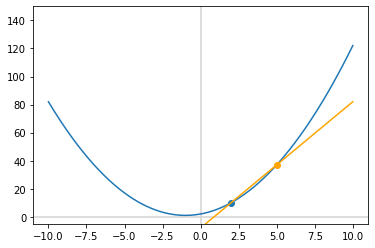

In [89]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5, 37, c='orange', zorder=3)
plt.ylim(-5, 150)
plt.plot(x, line_y, c='orange', zorder=3)
_ = ax.plot(x,y)

The closer $Q$ becomes to $P$, the closer the slope $m$ comes to being the true tangent of the point $P$. Let's demonstrate this with another point $Q$ at $x = 2.1$.

Previously, our $\Delta x$ between $Q$ and $P$ was equal to 3. Now it is much smaller: $$\Delta x = x_2 - x_1 = 2.1 - 2 = 0.1 $$

In [90]:
f(2.1)

10.61

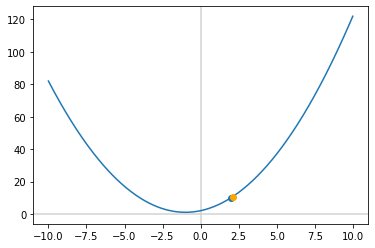

In [92]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c='orange', zorder=3)
_ = plt.plot(x,y)

In [94]:
m = (10.61-10)/(2.1-2)
m

6.099999999999989

In [95]:
b = 10.61 - m*2.1
b

-2.199999999999978

In [96]:
line_y = m*x + b

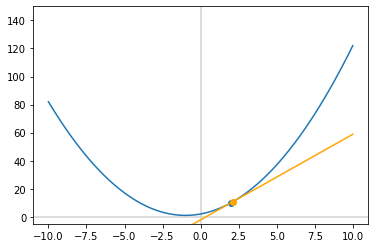

In [99]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c='orange', zorder=3)
plt.ylim(-5,150)
plt.plot(x, line_y, c='orange', zorder=3)
_= plt.plot(x,y)

The closer $Q$ becomes to $P$ (i.e., $\Delta x$ approaches 0), the clearer it becomes that the slope $m$ at point $P$ = (2, 10) is equal to 6.

Let's make $\Delta x$ extremely small, 0.000001, to illustrate this: